In [1]:
import os
import sys
import torch
import numpy as np
from matplotlib import cm, pyplot as plt

from utils.utils import *
from utils.constants import CUTSIZEX, CUTSIZEY, AREA, GT_MS_COUNT, US_STATES, AFRICAN_COUNTRIES

import pdb

In [4]:
country = "africa" # "us" or "africa"
district = "nigeria" # check utils.constants.py

# country = "us" # "us" or "africa"
# district = "pennsylvania" # check utils.constants.py

In [5]:
if country == "us":
    [center_x, center_y] = torch.load(
        "/atlas/u/jesslec/ObjectCount/object_count/notebooks/visualization/ms_building_dataset/us/{}_center.pth".format(district.replace('_', '')))
else:
    [center_x, center_y] = torch.load(
        "/atlas/u/jesslec/ObjectCount/object_count/notebooks/visualization/open_buildings/{}_center.pth".format(district))
    center_x, center_y = np.array(center_x), np.array(center_y)

(<matplotlib.collections.PathCollection at 0x7f2820c7bb38>,)

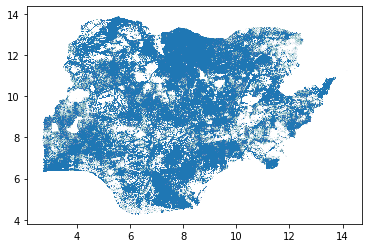

In [32]:
plt.scatter(np.array(center_x), np.array(center_y), s=0.001, alpha=0.1), 

In [11]:
len(center_x), center_x.shape

(22806268, (22806268,))

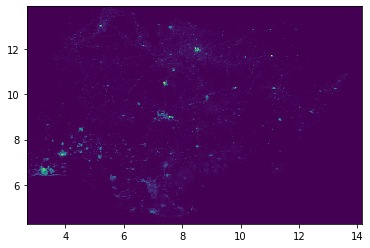

In [10]:
_ = plt.hist2d(np.array(center_x), np.array(center_y), bins=300)

In [14]:
data = np.stack([center_x, center_y], axis=1)
print(data.shape)

(22806268, 2)

In [45]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(data[np.random.permutation(len(data))][:100000]) # bandwidth might need to be tuned

# # use grid search cross-validation to optimize the bandwidth
# params = {'bandwidth': np.logspace(-1, 1, 20)}
# grid = GridSearchCV(KernelDensity(), params)
# grid.fit(data[:10000])

# print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# # use the best estimator to compute the kernel density estimate
# kde = grid.best_estimator_

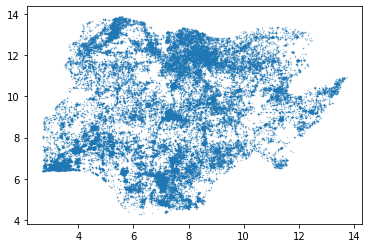

In [46]:
# sample new points from the data
new_data = kde.sample(100000, random_state=0)
plt.scatter(new_data[:,0], new_data[:,1], s=0.1, alpha=0.5)